<a href="https://colab.research.google.com/github/gcombarGitHub/GrafosFarmacosChile/blob/main/Grafos_ND_Agosto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Graph Theory on  Proteins
In this google colab we will compute some topological indices that will help us understand the "importancy" of each protein in terms of its connections.


---
# Installing and Loading the file
First we star by installing the libraries that we will need and loading a couple of functions



In [29]:
install.packages("igraph")
install.packages("ggraph")
install.packages("ggvenn")
install.packages("VennDiagram")
install.packages("gplots")
install.packages("UpSetR")


multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}
###################################################################
normalize <- function(x) {                                        # 
  return ((x - min(x)) / (max(x) - min(x)))                 }     #
###################################################################

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




---
Next we read the file with the proteins and the connections and changing the columns names. 

In [4]:
url <- 'https://github.com/gcombarGitHub/GrafosFarmacosChile/raw/main/02_output_T1T2T3-interacting-with-T4.csv'
library(readr)
Dat <- read_csv(url)


names(Dat)[1]<- "X";  
names(Dat)[2]<- "Y"; 
names(Dat)[3]<- "weight";
Dat$weight <- as.numeric(Dat$weight)*100
Dat$Prot_A <- NULL; Dat$Prot_B<-NULL

Rows: 13537 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): UniprotID Prot_A, UniprotID Prot_B, Prot_A, Prot_B
dbl (1): String Score


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.




---
If you load the data correctly, the data frame looks like the following table, were each row is a connection between the two proteins in each column




In [5]:
head(Dat, 5)

X,Y,weight
<chr>,<chr>,<dbl>
A0A0U1RRL7,A8K2U0,96.8
A0A0U1RRL7,O00425,94.5
A0A0U1RRL7,P03956,92.2
A0A0U1RRL7,P05019,96.0
A0A0U1RRL7,P08254,92.3


---
The next step is to created the Graph, you will need the library "igraph", install it if you haven't do so

In [8]:
library(igraph)
g <- graph_from_data_frame(Dat, directed = FALSE)



---
You can see the graph with the library "ggraph"

Loading required package: ggplot2



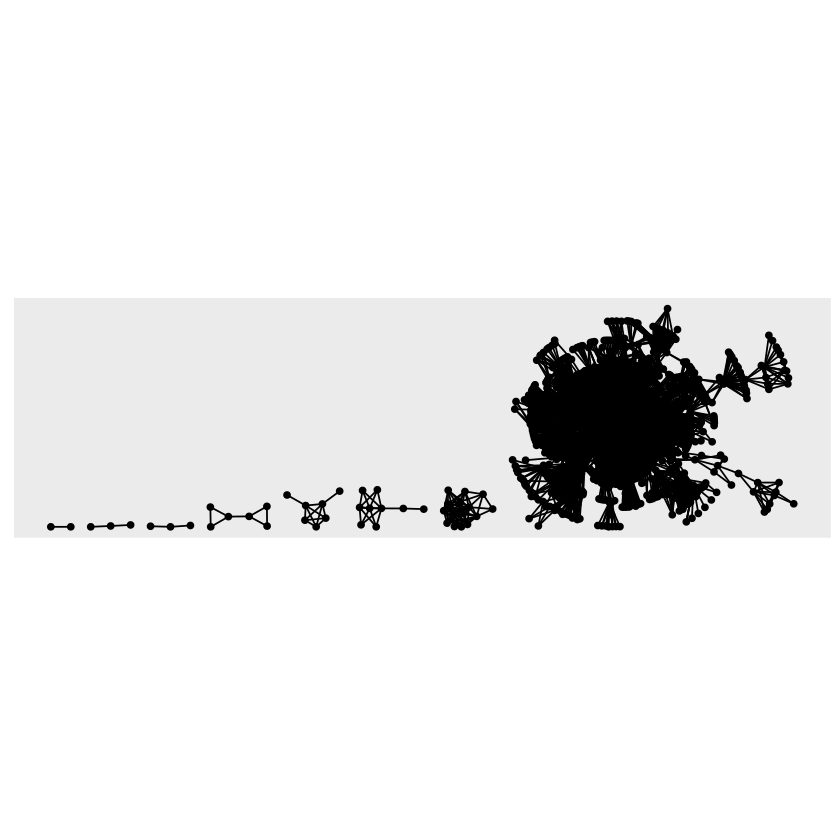

In [7]:
library(ggraph)
autograph(g)

---
Now, some information about the graph

In [9]:
print(paste("The Graph has",
      length(degree(g)),
      "vertex",
      nrow(Dat),
      "edges, and",
      length(g),
      "connected components"))

dg <- decompose.graph(g)

for (i in 1:length(dg))
{ 
  cg <- dg[[i]]
  print(paste("Component", i, "Size:", length(degree(cg)) ) )
}

[1] "The Graph has 1647 vertex 13537 edges, and 10 connected components"
[1] "Component 1 Size: 1602"
[1] "Component 2 Size: 3"
[1] "Component 3 Size: 15"
[1] "Component 4 Size: 6"
[1] "Component 5 Size: 7"
[1] "Component 6 Size: 2"
[1] "Component 7 Size: 9"
[1] "Component 8 Size: 3"


---
Next we compute the following indices of each vertex, we will  normalize our values, that means we will put all our values between 0 and 1. 



#Degree
In graph theory, the degree of a vertex of a graph is the number of edges that are incident to the vertex. 


In [10]:
Vertex <- as.data.frame(degree(g))
Vertex$Degree <- normalize(as.numeric(Vertex$`degree(g)`))
Vertex$`degree(g)` <- NULL


#Centrality
Centrality or eigenvector centrality (also called prestige score) is a measure of the influence of a node in a network. Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

If $A$  is the adjacency matrix of the graph $G$ the relative centrality, $x_v$ , score of vertex $v$ can be defined as:
$$
x_v = \frac{1}{\lambda}\sum_{t\in M(v)}x_t. 
$$

where $M(v)$ is a set of the neighbors of $v$ and $\lambda$ is a constant, in terms of the adjacency matrix this is $Ax=\lambda x$.


In [11]:
Vertex$Centrality <- eigen_centrality(g)$vector


#Betweenness

The betweenness centrality (or "betweenness”) is a measure of centrality, for each vertex the betweenness is by definition the number of these shortest paths that pass through the vertex.

For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that the number of edges that the path passes through is minimized. 

The betweenness  centrality $b(v)$ of a node $v$ is define  by:
$$
b(v) = \sum_{s\ne v\ne t\in V}\frac{\sigma_{st}(v)}{\sigma_{st}}
$$

Where $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$ and $\sigma_{st}(v)$ is the number of those paths that pass through $v$.

In social network analysis, betweenness centrality can reflect power, because they allow the person on the bridging position to decide whether to share information or not over the persons it connects between. In online social networks a high betweenness centrality coincides with nominations of closest friends.


In [12]:
Vertex$Betweenness <- normalize(betweenness(g, normalized = TRUE ))



#Pagerank

PageRank  is an algorithm used by Google Search to rank web pages, it is a way of measuring the importance of website pages. According to Google:
 	“PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.”



In [13]:
Vertex$PageRank <- normalize(page_rank(g)$vector)


#Closeness
Closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph, that is
$$
C(x) = \frac{1}{\sum_y d(x,y)}
$$
where $d(x,y)$ is the distance between the vertices $x,y$. A high closeness can be thought of as an easy access to all nodes. 


In [14]:
Vertex$Closeness <- normalize(closeness(g))


Warning message in closeness(g):
“At centrality.c:2617 :closeness centrality is not well-defined for disconnected graphs”


---
Next we classify the vertex with values over the 50%, and save a copy of the original vertex

In [15]:
Vertex$N <- c(1:length(Vertex$Degree))
Vertex$DegreeCat <- ifelse(Vertex$Degree < 0.5, "no", "yes")
Vertex$CentralityCat <- ifelse(Vertex$Centrality < 0.5, "no", "yes")
Vertex$BetweennessCat <- ifelse(Vertex$Betweenness < 0.5, "no", "yes")
Vertex$PageRankCat <- ifelse(Vertex$PageRank < 0.5, "no", "yes")
Vertex$ClosenessCat <- ifelse(Vertex$Closeness < 0.5, "no", "yes")

V_Original <- Vertex


Best_Degree <- as.list(as.character(row.names(Vertex[Vertex$DegreeCat == "yes",])))
Best_Closeness <- as.list(as.character(row.names(Vertex[Vertex$ClosenessCat == "yes",])))
Best_Centrality <- as.list(as.character(row.names(Vertex[Vertex$CentralityCat == "yes",])))
Best_Betweenness <- as.list(as.character(row.names(Vertex[Vertex$BetweennessCat == "yes",])))
Best_PageRank <- as.list(as.character(row.names(Vertex[Vertex$PageRankCat == "yes",])))


---
The final table for our vertex looks like this:


In [16]:
head(Vertex, 5)

,Degree,Centrality,Betweenness,PageRank,Closeness,N,DegreeCat,CentralityCat,BetweennessCat,PageRankCat,ClosenessCat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
A0A0U1RRL7,0.13513514,2.665655e-03,0.039184894,0.24743199,0.7152755,1,no,no,no,no,yes
A0A1B0GTR4,0.01351351,2.847795e-12,0.000000000,0.07435480,0.1930338,2,no,no,no,no,no
A0A1B0GUI7,0.01351351,1.076341e-07,0.001238685,0.06548585,0.3933533,3,no,no,no,no,no
A0A1B0GVZ6,0.05405405,1.051798e-04,0.001751407,0.07481698,0.6462760,4,no,no,no,no,yes
A0A2Z4LIS9,0.01351351,2.345483e-04,0.000000000,0.02811072,0.6578707,5,no,no,no,no,yes


---
Let's see the behaviour of all the topological index that we have

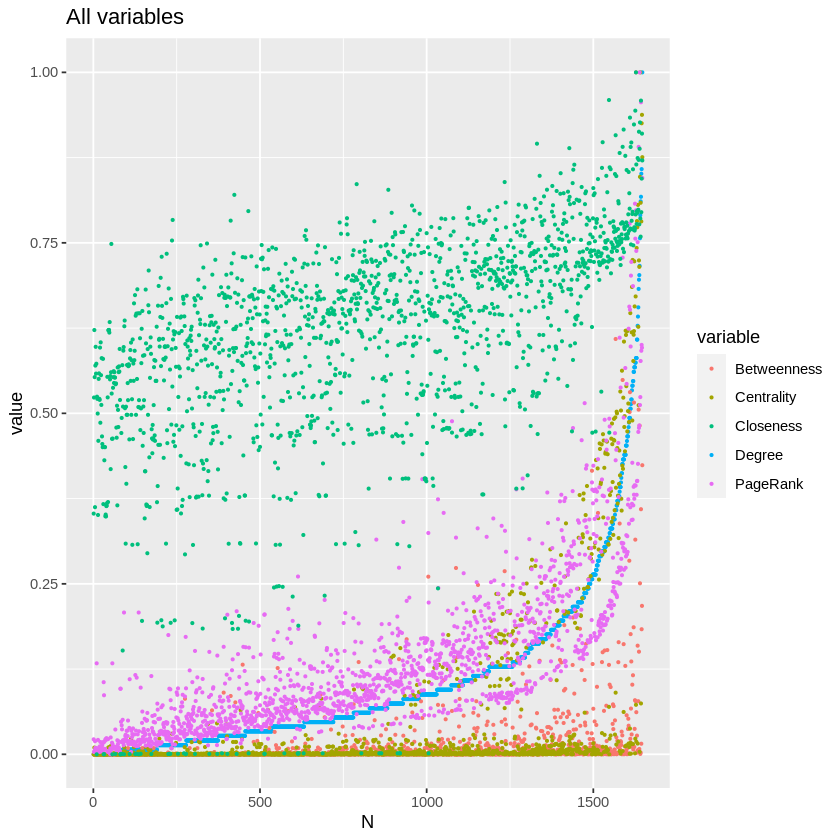

In [18]:
library("tidyverse")
Vertex <- Vertex[order(Vertex$Degree, decreasing = FALSE), ]
Vertex$N <- c(1:nrow(Vertex) )
df <- Vertex %>%
  select(N, Degree, Betweenness, Centrality, PageRank, Closeness) %>%
  gather(key = "variable", value = "value", -N)

ggplot(df, aes(x = N, y = value)) + 
  geom_point(aes(color = variable), size=0.5)  +
  labs(title="All variables")

---
#Set Theory and Venn Diagrams
Now we will continue studying the variables all together using set theory and diagrams. 

We start by creating sets with the top 50% in each index, and the look for the intersections. 

Loading required package: futile.logger



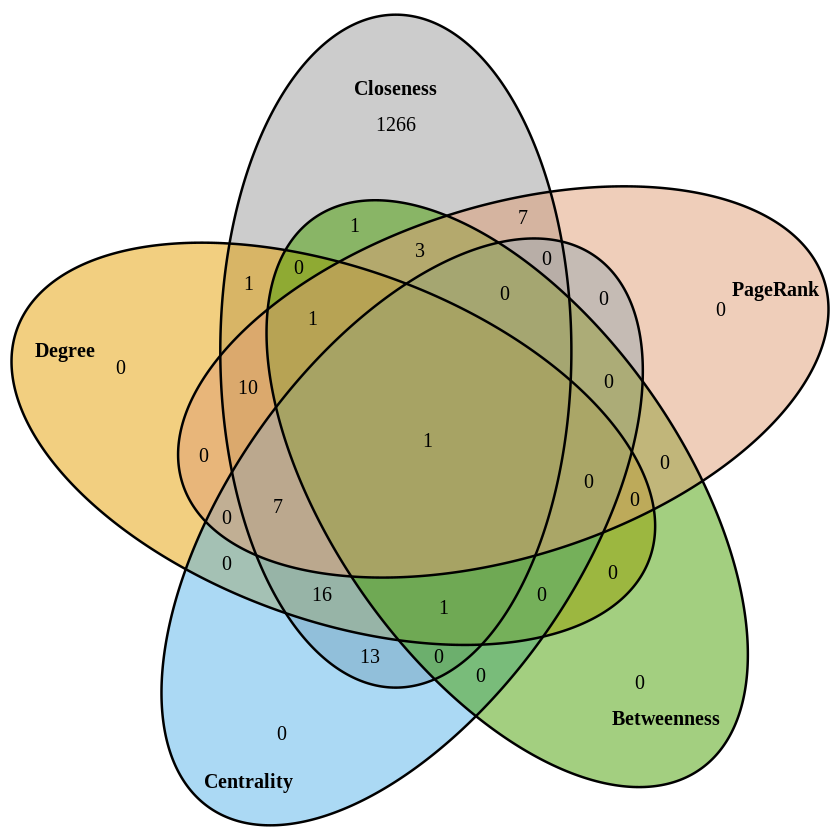

In [25]:
library(ggvenn)
x <- list(
  Closeness = Best_Closeness, 
  Degree = Best_Degree,
  Centrality = Best_Centrality,
  Betweenness = Best_Betweenness,
  PageRank = Best_PageRank
)
library(VennDiagram)
display_venn <- function(x, ...){  
  grid.newpage()
  venn_object <- venn.diagram(x, filename = NULL, ...)
  grid.draw(venn_object)
}
display_venn(
  x,
  fill = c("#999999", "#E69F00", "#56B4E9", "#469F00", "#E09E75"),
  # Set names
  cat.cex = 1,
  cat.fontface = "bold",
  cat.default.pos = "outer",
  cat.dist = c(0.05, 0.08, 0.08, 0.06, 0.08)
)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




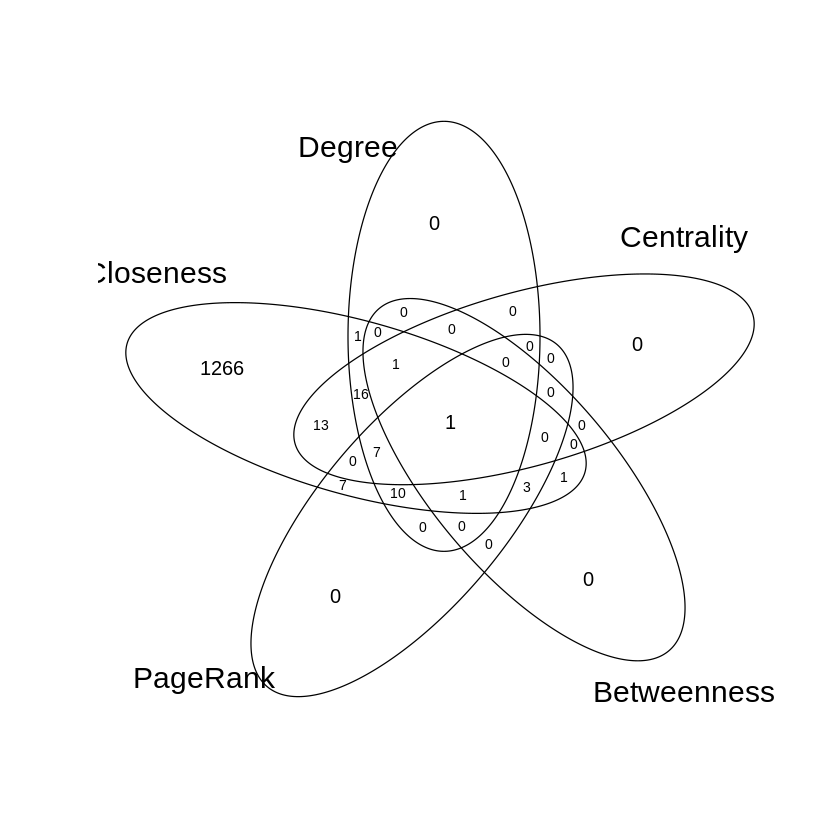

In [ ]:
library(gplots)
isect <- attr(venn(x, intersection=TRUE), "intersection")


---
Next we will see the size of the intersections in a bar diagram 

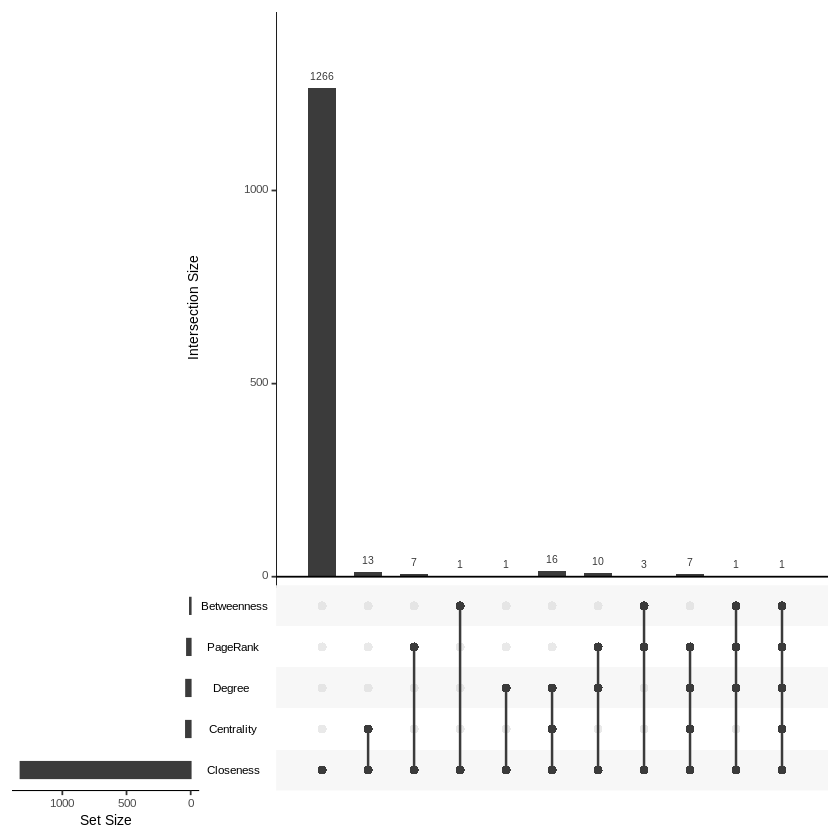

In [30]:

library(UpSetR)
input <- c(
  Centrality = length(isect$Centrality),
#  Degree =length(isect$Degree),
  PageRank = length(isect$PageRank),
  Closeness =length(isect$Closeness), 
  Betweenness =length(isect$Betweenness),
 # "Degree&Centrality" =  length(isect$`Degree:Centrality`),
  "Degree&PageRank" =  length(isect$`Degree:PageRank`),
  "Degree&Closeness" =  length(isect$`Closeness:Degree`),
  "Degree&Betweenness" =  length(isect$`Degree:Betweenness`),
  "Centrality&PageRank" =  length(isect$`PageRank:Centrality`),
  "Centrality&Closeness" =  length(isect$`Closeness:Centrality`),
  "Centrality&Betweenness" =  length(isect$`Betweenness:Centrality`),
  "PageRank&Closeness" =  length(isect$`Closeness:PageRank`),
  "PageRank&Betweenness" =  length(isect$`Betweenness:PageRank`),
  "Betweenness&Closeness" =  length(isect$`Closeness:Betweenness`),
  "Degree&Centrality&PageRank" =  length(isect$`Degree:Centrality:PageRank`),
  "Degree&Centrality&Closeness" =  length(isect$`Closeness:Degree:Centrality`),
  "Degree&Centrality&Betweenness" =  length(isect$`Degree:Centrality:Betweenness`),
  "Degree&PageRank&Closeness" =  length(isect$`Closeness:Degree:PageRank`),
  "Degree&PageRank&Betweenness" =  length(isect$`Degree:Betweenness:PageRank`),
  "Degree&Closeness&Betweenness" =  length(isect$`Degree:Closeness:Betweenness`),
  "Centrality&PageRank&Closeness" =  length(isect$`PageRank:Centrality:Closeness`),
  "Centrality&PageRank&Betweenness" =  length(isect$`PageRank:Centrality:Betweenness`),
  "Centrality&Closeness&Betweenness" =  length(isect$`Closeness:Centrality:Betweenness`),
  "PageRank&Closeness&Betweenness" =  length(isect$`Closeness:Betweenness:PageRank`),
  "Degree&Centrality&PageRank&Closeness" =  length(isect$`Closeness:Degree:Centrality:PageRank`), 
  "Degree&Centrality&PageRank&Betweenness" =  length(isect$`Degree:Centrality:Betweenness:PageRank`),
  "Centrality&PageRank&Betweenness&Closeness" =  length(isect$`Centrality:PageRank:Betweenness:Closeness`),
  "Degree&PageRank&Betweenness&Closeness" =  length(isect$`Closeness:Degree:Betweenness:PageRank`),
#  "Degree&Centrality&Betweenness&Closeness" =  length(isect$`Closeness:Degree:Centrality:Betweenness`),
  "Degree&Centrality&PageRank&Betweenness&Closeness" =  length(isect$`Closeness:Degree:Centrality:Betweenness:PageRank`)
  )
upset(fromExpression(input))

---
These proteins are grouped in modules, this information is in the file "FunctionalModules.csv", we would like too see how much every module add in each topological index.

First we read the modules and find out in which module is each protein. 

In [33]:
url <- 'https://raw.githubusercontent.com/gcombarGitHub/GrafosFarmacosChile/main/FunctionalModules.csv'
library(readr)
Functional_modules <- read_csv(url)
Functional_modules <- Functional_modules[-c(1),]

Vertex$Module <- NA
for ( i in c( 1:length(rownames(Vertex)) )){
  if(length(which((Functional_modules)== rownames(Vertex)[i], arr.ind =T ) )>0 ){
    cl <- which((Functional_modules)== rownames(Vertex)[i], arr.ind = T)[1,2]
    Vertex$Module[i] <-colnames(Functional_modules)[cl]
  }
}



Rows: 140 Columns: 20

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): Acetylcholine-gated channel, Oxidation-reduction process, Cell sur...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



---
Now we will rename the modules just to make the graphs easy to read

In [34]:
Vertex$Module2[Vertex$Module == "Acetylcholine-gated channel"] = "01"
Vertex$Module2[Vertex$Module == "Adenylate cyclase activity"] = "02"
Vertex$Module2[Vertex$Module == "Axon"] = "03"
Vertex$Module2[Vertex$Module == "B cell differentiation"] = "04"
Vertex$Module2[Vertex$Module == "Cell surface receptor signaling pathway"] = "05"
Vertex$Module2[Vertex$Module == "Chemokine-mediated signaling pathway"] = "06"
Vertex$Module2[Vertex$Module == "Early endosome"] = "07"
Vertex$Module2[Vertex$Module == "GABA-A receptor complex"] = "08"
Vertex$Module2[Vertex$Module == "Histone deacetylase binding"] = "09"
Vertex$Module2[Vertex$Module == "Insulin receptor siganling pathway"] = 10
Vertex$Module2[Vertex$Module == "Magnesium ion binding"] = 11
Vertex$Module2[Vertex$Module == "Neuropeptide signaling pathway"] = 12
Vertex$Module2[Vertex$Module == "Oxidation-reduction process"] = 13
Vertex$Module2[Vertex$Module == "Positivie regulation of peptidyl-tyrosine phosphorilation"] = 14
Vertex$Module2[Vertex$Module == "Protease binding"] = 15
Vertex$Module2[Vertex$Module == "RNA pol II distal enhancer sequence-specific DNA binding"] = 16
Vertex$Module2[Vertex$Module == "Transcription coregulator activity"] = 17
Vertex$Module2[Vertex$Module == "Transmembrane receptor protein tyrosine kinase signaling"] = 18
Vertex$Module2[Vertex$Module == "Ubiquitin protein ligase activity"] = 19
Vertex$Module2[Vertex$Module == "Voltage-gated calcium channel complex"] = 20

---
Now we can do a boxplot for each module in each topological index

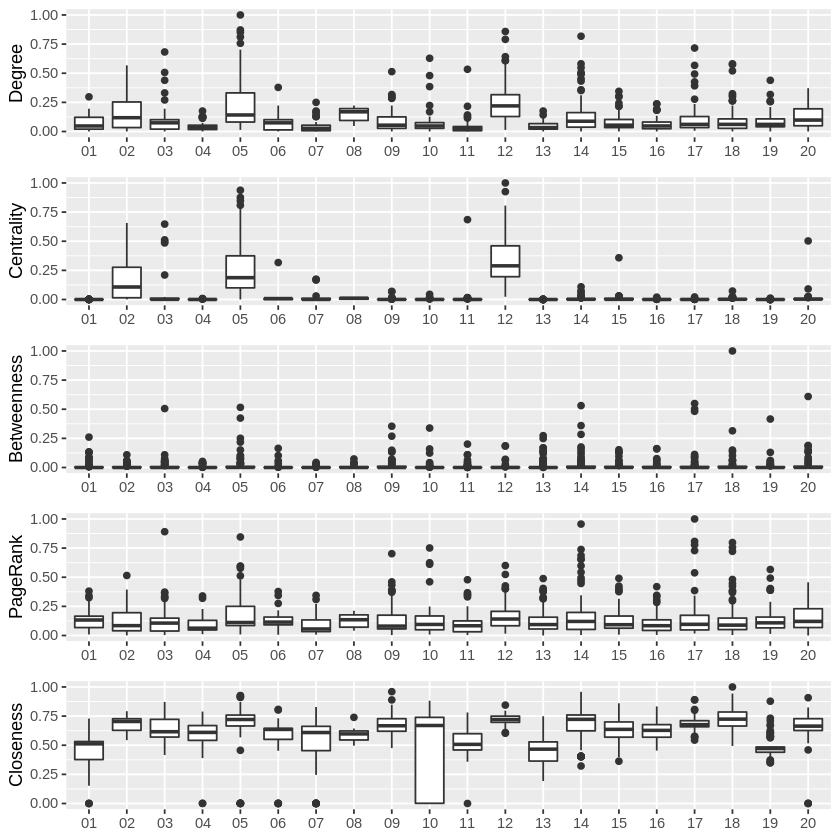

In [36]:
p0 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=Degree))+
  theme(axis.title.x=element_blank())
p1 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=Centrality))+
  theme(axis.title.x=element_blank())
p2 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=Betweenness))+
  theme(axis.title.x=element_blank())
p3 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=PageRank))+
  theme(axis.title.x=element_blank())
p4 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_boxplot(aes(x = Module2, y=Closeness))+
  theme(axis.title.x=element_blank())        
multiplot(p0, p1, p2, p3, p4, cols=1 )

---
The barplot graph for each index


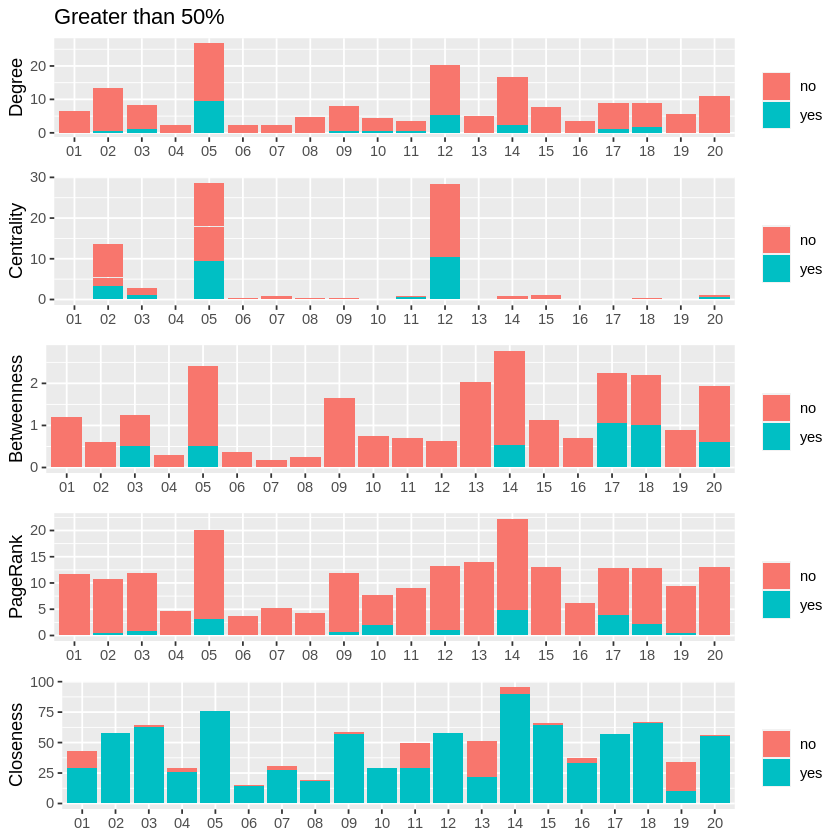

In [44]:

p0 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=Degree, fill=DegreeCat))+ 
  labs( fill = "", title = "Greater than 50%")+
  theme(axis.title.x=element_blank())
p1 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=Centrality, fill=CentralityCat))+ 
  labs( fill = "", ) +
  theme(axis.title.x=element_blank())
p2 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=Betweenness, fill=BetweennessCat))+ 
  labs( fill = "")+
  theme(axis.title.x=element_blank())
p3 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=PageRank, fill=PageRankCat))+ 
  labs( fill = "")+
  theme(axis.title.x=element_blank())
p4 <- ggplot(subset(Vertex, !is.na(Module2))) +
  geom_col(aes(x = Module2, y=Closeness, fill=ClosenessCat))+ 
  labs( fill = "") +
  theme(axis.title.x=element_blank())
multiplot(p0, p1, p2, p3, p4, cols=1 )

---